In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 48.9MB/s]


In [4]:
!ls

drive  mobile-price-classification.zip	sample_data


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

In [6]:
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
df=pd.read_csv('/content/files/train.csv')
test=pd.read_csv('/content/files/test.csv')

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.shape

(2000, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Task 1

## Change labels of Price Range

In [11]:
df2 = df.copy()
df2['price_range'].head(10)

0    1
1    2
2    2
3    2
4    1
5    1
6    3
7    0
8    0
9    0
Name: price_range, dtype: int64

In [12]:
df2['price_range'] = df2['price_range'].replace([0,1],0)
df2['price_range'] = df2['price_range'].replace([2,3],1)
df2['price_range'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: price_range, dtype: int64

## Scaling

In [13]:
X = df2.drop(['price_range'], axis=1)
y = df2['price_range']

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


## Logestic Regression Model

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve
LR = LogisticRegression(max_iter = 2000)
LR = LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict, pos_label = 1)
auc_LR = auc(fpr, tpr)
auc_LR

0.9824999999999999

## Forward selection

In [17]:
selected_features = []
all_features = X.columns.tolist()
best_auc = 0

for f in all_features:
  remain_cols = list(set(all_features)-set(selected_features))
  best_col = ''
  for col in remain_cols:
    selected_features.append(col)

    X_train_temp = pd.DataFrame(data = X_train, columns = selected_features)
    X_test_temp = pd.DataFrame(data = X_test, columns = selected_features)

    LR = LR.fit(X_train_temp, y_train)
    y_predict = LR.predict(X_test_temp)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict, pos_label = 1)
    
    auc_temp = auc(fpr, tpr)
    
    if auc_temp > best_auc:
        best_auc = auc_temp
        best_col = col

    selected_features.pop()
  
  if best_col: selected_features.append(best_col)

selected_features

['ram',
 'battery_power',
 'px_height',
 'px_width',
 'touch_screen',
 'mobile_wt',
 'three_g']

In [18]:
best_auc

0.99

# Task 2

## Precision, Recall and F1-score on selected features (forward selection)

In [19]:
from sklearn.metrics import precision_recall_fscore_support
X_train_selected_features = X_train[selected_features]
X_test_selected_features = X_test[selected_features]

LR = LR.fit(X_train_selected_features, y_train)
y_predict = LR.predict(X_test_selected_features)
PRFS = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('precision = ' , PRFS[0])
print('recall = ' , PRFS[1])
print('f1_score = ' , PRFS[2])

precision =  0.9901960784313725
recall =  0.99
f1_score =  0.98999899989999


# Task 3

## PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape) 

(1600, 7)


# Task 4

## Precision, Recall and F1-score (PCA)

In [21]:
LR = LR.fit(X_train_reduced, y_train)
y_predict = LR.predict(X_test_reduced)
PRFS = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('precision = ' , PRFS[0])
print('recall = ' , PRFS[1])
print('f1_score = ' , PRFS[2])

precision =  0.6675376959815957
recall =  0.6675
f1_score =  0.6674812958228901


# Task 6

## Feature Engineering

### a) Binning

In [22]:
df_final = df.copy()
print(df['battery_power'].min())
print(df['battery_power'].max())

501
1998


In [23]:
df3 = df.copy()
cut_labels = ['bad', 'normal', 'good']
cut_bins = [500, 900, 1600, 2000]
df3['cut_battery_power'] = pd.cut(df3['battery_power'], bins = cut_bins, labels = cut_labels)
df3['cut_battery_power']

0          bad
1       normal
2          bad
3          bad
4         good
         ...  
1995       bad
1996      good
1997      good
1998    normal
1999       bad
Name: cut_battery_power, Length: 2000, dtype: category
Categories (3, object): ['bad' < 'normal' < 'good']

In [24]:
df3['cut_battery_power'].value_counts()

normal    916
bad       565
good      519
Name: cut_battery_power, dtype: int64

### b) One hot encoding

In [25]:
df4 = pd.get_dummies(df3)
df_final = pd.get_dummies(df3)
df4.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cut_battery_power_bad,cut_battery_power_normal,cut_battery_power_good
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,1,0,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,0,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,0,0,1


### c) Log transformation

Find skewed features

In [26]:
df5 = df.copy()
from scipy.stats import skew
skewed_features = []
for col in X.columns:
  s = skew(df5[col])
  print('skewness of',col, ' = ' , s)

skewness of battery_power  =  0.03187454295305568
skewness of blue  =  0.02000100007500624
skewness of clock_speed  =  0.17795052935349268
skewness of dual_sim  =  -0.03800686085763292
skewness of fc  =  1.0190463925723268
skewness of four_g  =  -0.08607961742649396
skewness of int_memory  =  0.05784590180779676
skewness of m_dep  =  0.08901518436117652
skewness of mobile_wt  =  0.0065532377855500356
skewness of n_cores  =  0.0036247871155484306
skewness of pc  =  0.017293168153506185
skewness of px_height  =  0.6657714484857727
skewness of px_width  =  0.014776380851328284
skewness of ram  =  0.006623063336208135
skewness of sc_h  =  -0.0988100623460247
skewness of sc_w  =  0.6333116340766181
skewness of talk_time  =  0.00950462691314207
skewness of three_g  =  -1.2272203362251917
skewness of touch_screen  =  -0.01200021600583211
skewness of wifi  =  -0.02800274440343397


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

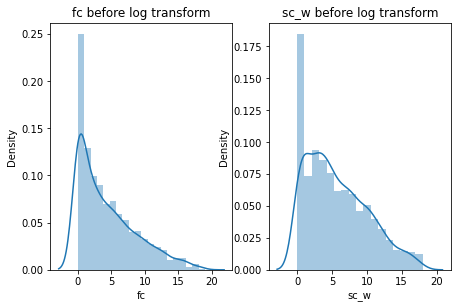

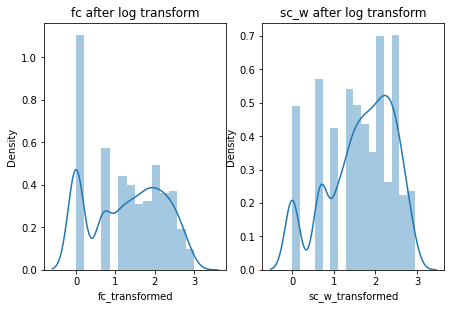

In [27]:
df5['fc_transformed'] = np.log(df5['fc']+1) 
df5['sc_w_transformed'] = np.log(df5['sc_w']+1)

df_final['fc_transformed'] = np.log(df_final['fc']+1) 
df_final['sc_w_transformed'] = np.log(df_final['sc_w']+1)

fig = plt.figure(figsize = (15,10))
sub = fig.add_subplot(2, 4, 1)
sub.set_title('fc before log transform')
sns.distplot(df5['fc'])
sub = fig.add_subplot(2, 4, 2)
sub.set_title('sc_w before log transform')
sns.distplot(df5['sc_w'])

fig2 = plt.figure(figsize = (15,10))
sub = fig2.add_subplot(2, 4, 1)
sub.set_title('fc after log transform')
sns.distplot(df5['fc_transformed'])
sub = fig2.add_subplot(2, 4, 2)
sub.set_title('sc_w after log transform')
sns.distplot(df5['sc_w_transformed'])

### d) Create a new feature

In [28]:
df6 = df.copy()
df6['sc_area'] = df6['sc_w'] * df6['sc_h']
df_final['sc_area'] = df_final['sc_w'] * df_final['sc_h']
df6.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,16


# Task 7

## SVM Model on original data

In [29]:
from sklearn import svm
X = df.drop(['price_range'], axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

clf = svm.SVC()
clf.fit(X_train, y_train)
print('Accuracy = ', clf.score(X_test, y_test))

Accuracy =  0.96


## a,b) SVM Model after binning and one hot encoding

In [30]:
X = df4.drop(['price_range', 'battery_power'], axis=1)
y = df4['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

clf = svm.SVC()
clf.fit(X_train, y_train)
print('Accuracy = ', clf.score(X_test, y_test))

Accuracy =  0.8275


## c) SVM Model after log tranformation

In [31]:
X = df5.drop(['price_range', 'fc' , 'sc_w'], axis=1)
y = df5['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

clf = svm.SVC()
clf.fit(X_train, y_train)
print('Accuracy = ', clf.score(X_test, y_test))

Accuracy =  0.96


## d) SVM Model after create a new feature

In [32]:
X = df6.drop(['price_range'], axis=1)
y = df6['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

clf = svm.SVC()
clf.fit(X_train, y_train)
print('Accuracy = ', clf.score(X_test, y_test))

Accuracy =  0.96


## a, b, c, d) SVM Model after all above feature engineerings 

In [33]:
X = df_final.drop(['price_range', 'battery_power', 'fc' , 'sc_w'], axis=1)
y = df_final['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

clf = svm.SVC()
clf.fit(X_train, y_train)
print('Accuracy = ', clf.score(X_test, y_test))

Accuracy =  0.8225


# Extra Task 1

## Backward Selection

In [34]:
X = df2.drop(['price_range'], axis=1)
y = df2['price_range']

sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
LR = LogisticRegression(max_iter = 2000)

In [35]:
selected_features = X.columns.tolist()
all_features = X.columns.tolist()
best_auc = 0

remain_cols = X.columns.tolist()
for f in all_features:
  
  worst_col = ''
  for col in selected_features:
    selected_features.remove(col)

    X_train_temp = pd.DataFrame(data = X_train, columns = selected_features)
    X_test_temp = pd.DataFrame(data = X_test, columns = selected_features)

    LR = LR.fit(X_train_temp, y_train)
    y_predict = LR.predict(X_test_temp)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict, pos_label = 1)
    
    auc_temp = auc(fpr, tpr)
    
    if auc_temp > best_auc:
        best_auc = auc_temp
        worst_col = col

    selected_features.append(col)
  
  if worst_col: 
    selected_features.remove(worst_col)

selected_features

['int_memory',
 'ram',
 'sc_h',
 'mobile_wt',
 'dual_sim',
 'wifi',
 'px_height',
 'battery_power',
 'px_width',
 'pc',
 'sc_w',
 'n_cores',
 'blue',
 'm_dep',
 'four_g',
 'touch_screen',
 'three_g']

In [36]:
best_auc

0.99

## Precision, Recall and F1-score on selected features (backward selection)

In [37]:
X_train_selected_features = X_train[selected_features]
X_test_selected_features = X_test[selected_features]

LR = LR.fit(X_train_selected_features, y_train)
y_predict = LR.predict(X_test_selected_features)
PRFS = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('precision = ' , PRFS[0])
print('recall = ' , PRFS[1])
print('f1_score = ' , PRFS[2])

precision =  0.9901960784313725
recall =  0.99
f1_score =  0.98999899989999
